In [34]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

# tải tập dũ liệu
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# xử lý dữ liệu
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Xác định cấu trúc mô hình
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Define the data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)
# Train the model with data augmentation and early stopping
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist7.h5')


Epoch 1/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.6445 - accuracy: 0.8489 - val_loss: 0.1600 - val_accuracy: 0.9691
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2428 - accuracy: 0.9432 - val_loss: 0.1127 - val_accuracy: 0.9778
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1913 - accuracy: 0.9554 - val_loss: 0.0941 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1774 - accuracy: 0.9597 - val_loss: 0.1088 - val_accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1673 - accuracy: 0.9618 - val_loss: 0.0819 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1616 - accuracy: 0.9644 - val_loss: 0.0942 - val_accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1607 - accuracy: 0.9642 - val_loss: 0.0936 

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image, ImageDraw, ImageOps


image_number = 1
model = load_model('mnist7.h5')
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        
        img = np.invert(np.array([img]))
        # print(img)
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")

284
284


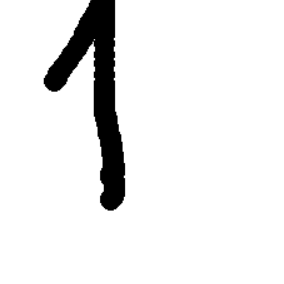

1/1 [==============================] - 1s 529ms/step
284
284


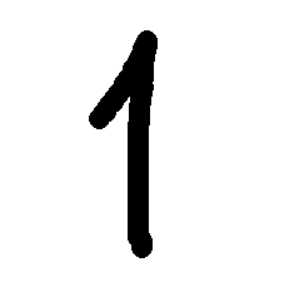

1/1 [==============================] - 0s 42ms/step
284
284


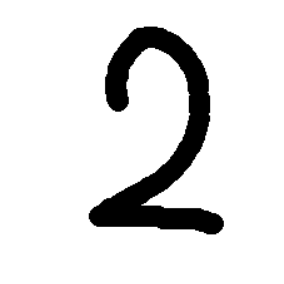

1/1 [==============================] - 0s 34ms/step
284
284


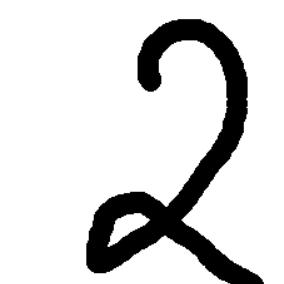

1/1 [==============================] - 0s 40ms/step
284
284


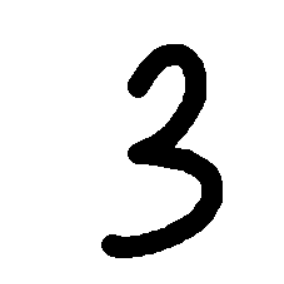

1/1 [==============================] - 0s 39ms/step
284
284


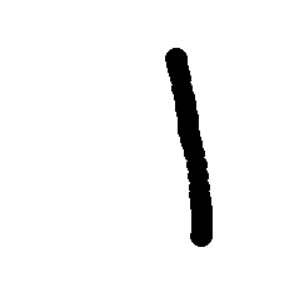

1/1 [==============================] - 0s 40ms/step
284
284


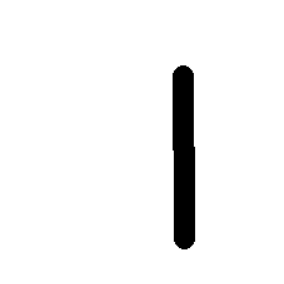

1/1 [==============================] - 0s 33ms/step
284
284


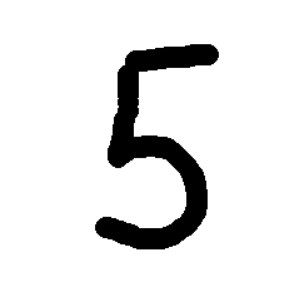

1/1 [==============================] - 0s 30ms/step
284
284


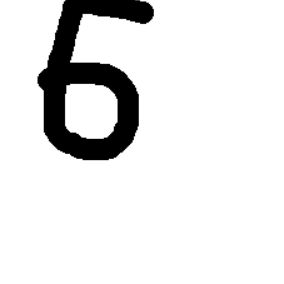

1/1 [==============================] - 0s 32ms/step
284
284


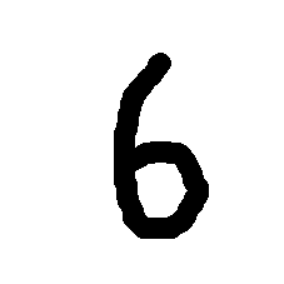

1/1 [==============================] - 0s 38ms/step
284
284


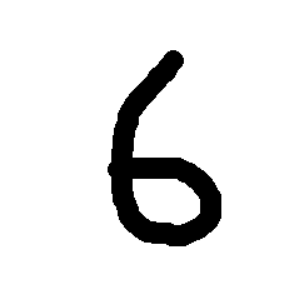

1/1 [==============================] - 0s 24ms/step
284
284


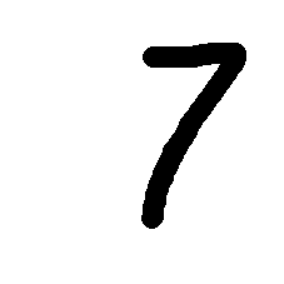

1/1 [==============================] - 0s 33ms/step
284
284


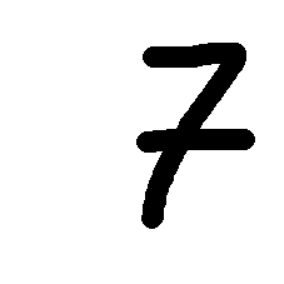

1/1 [==============================] - 0s 41ms/step
284
284


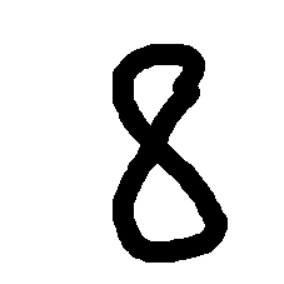

1/1 [==============================] - 0s 34ms/step
284
284


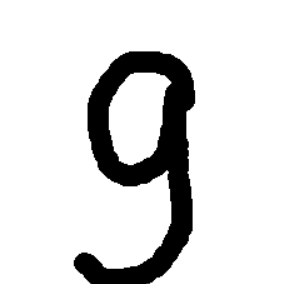

1/1 [==============================] - 0s 37ms/step
284
284


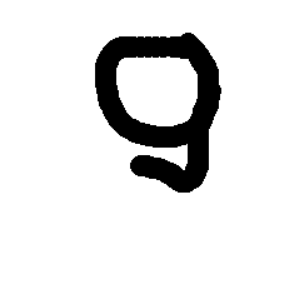

1/1 [==============================] - 0s 40ms/step
284
284


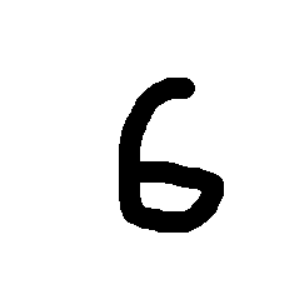

1/1 [==============================] - 0s 40ms/step
284
284


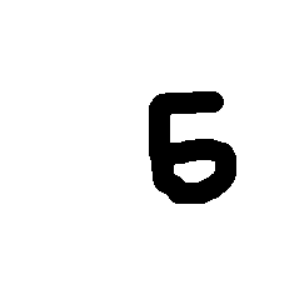

1/1 [==============================] - 0s 32ms/step
284
284


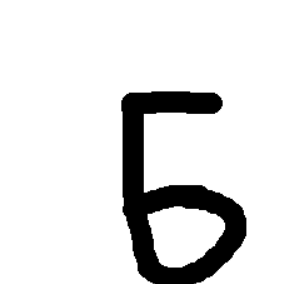

1/1 [==============================] - 0s 36ms/step
284
284


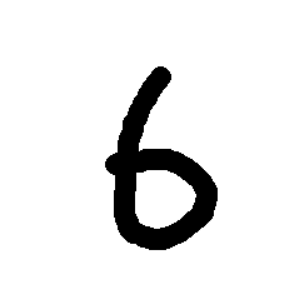

1/1 [==============================] - 0s 39ms/step
284
284


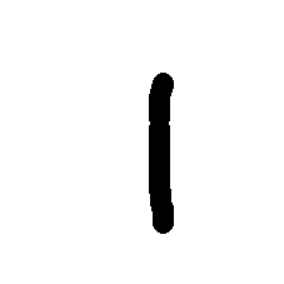

1/1 [==============================] - 0s 45ms/step
284
284


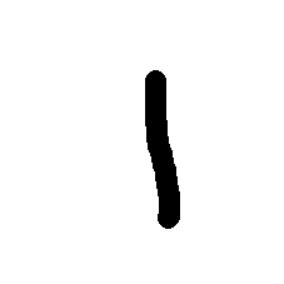

1/1 [==============================] - 0s 33ms/step
284
284


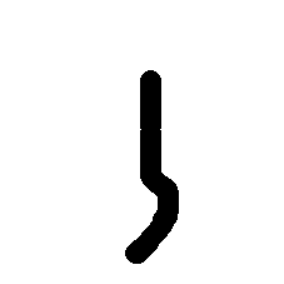

1/1 [==============================] - 0s 42ms/step
284
284


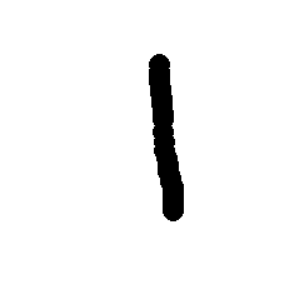

1/1 [==============================] - 0s 40ms/step
284
284


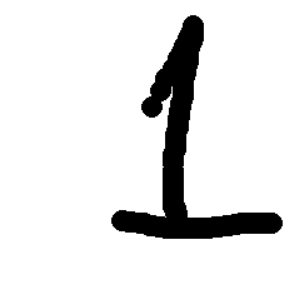

1/1 [==============================] - 0s 41ms/step
284
284


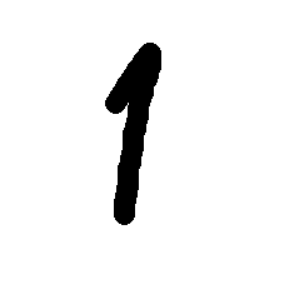

1/1 [==============================] - 0s 36ms/step
284
284


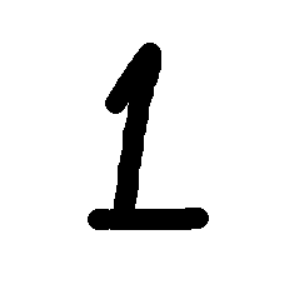

1/1 [==============================] - 0s 32ms/step
284
284


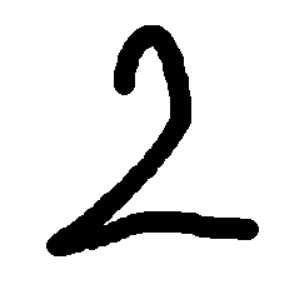

1/1 [==============================] - 0s 25ms/step
284
284


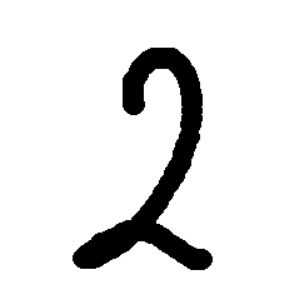

1/1 [==============================] - 0s 32ms/step
284
284


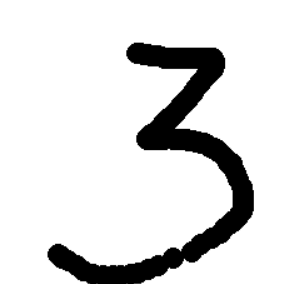

1/1 [==============================] - 0s 43ms/step
284
284


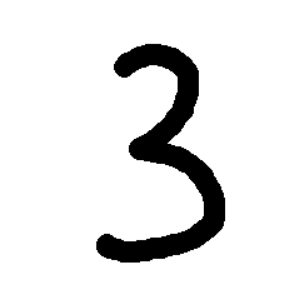

1/1 [==============================] - 0s 40ms/step
284
284


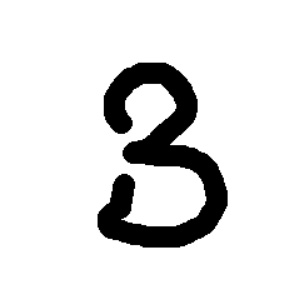

1/1 [==============================] - 0s 35ms/step
284
284


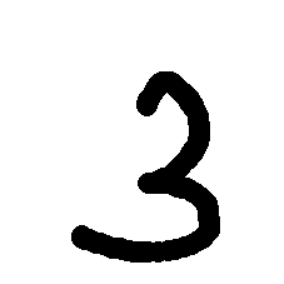

1/1 [==============================] - 0s 32ms/step
284
284


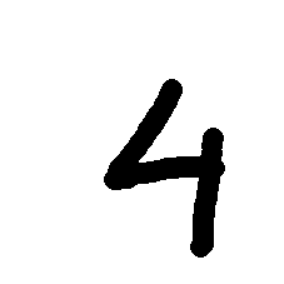

1/1 [==============================] - 0s 32ms/step
284
284


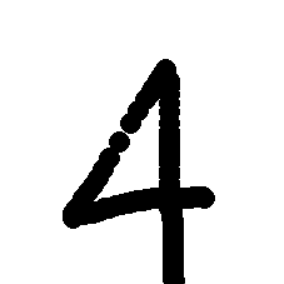

1/1 [==============================] - 0s 56ms/step
284
284


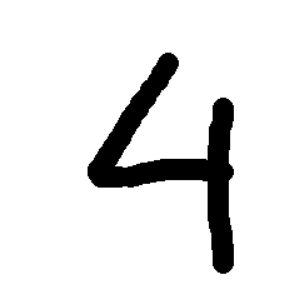

1/1 [==============================] - 0s 41ms/step
284
284


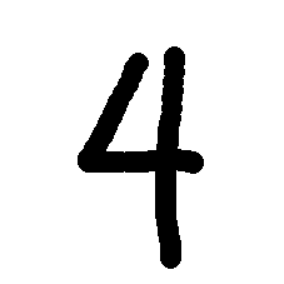

1/1 [==============================] - 0s 36ms/step
284
284


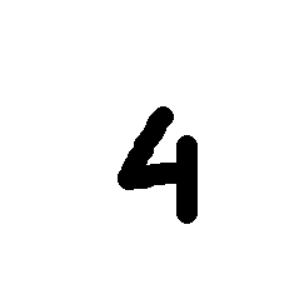

1/1 [==============================] - 0s 37ms/step
284
284


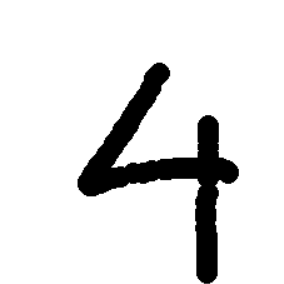

1/1 [==============================] - 0s 25ms/step
284
284


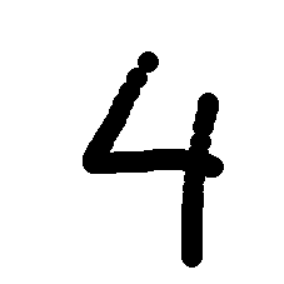

1/1 [==============================] - 0s 38ms/step
284
284


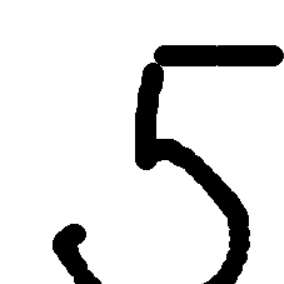

1/1 [==============================] - 0s 32ms/step
284
284


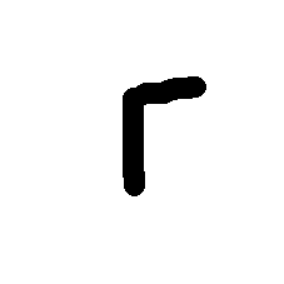

1/1 [==============================] - 0s 32ms/step
284
284


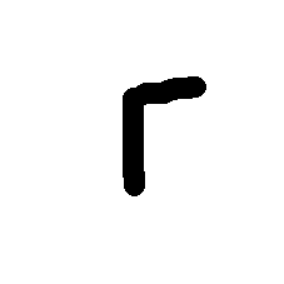

1/1 [==============================] - 0s 33ms/step
284
284


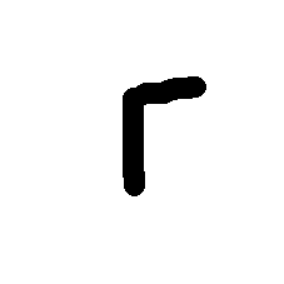

1/1 [==============================] - 0s 42ms/step
284
284


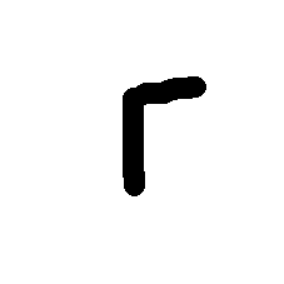

1/1 [==============================] - 0s 41ms/step
284
284


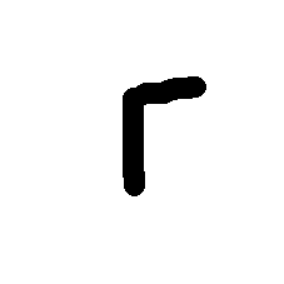

1/1 [==============================] - 0s 40ms/step
284
284


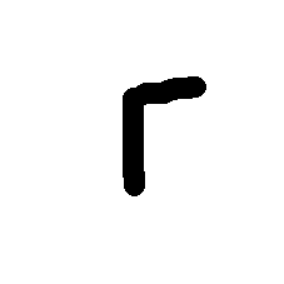

1/1 [==============================] - 0s 36ms/step
284
284


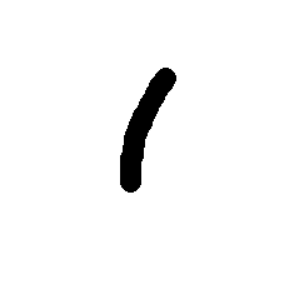

1/1 [==============================] - 0s 44ms/step
284
284


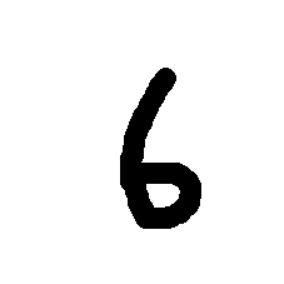

1/1 [==============================] - 0s 41ms/step
284
284


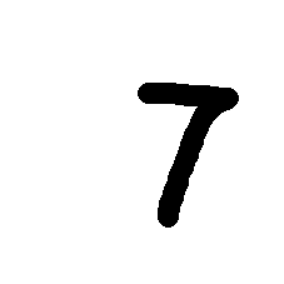

1/1 [==============================] - 0s 33ms/step
284
284


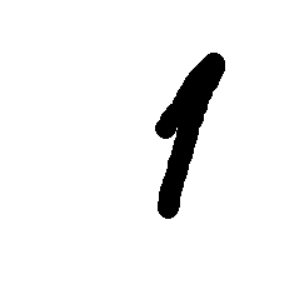

1/1 [==============================] - 0s 40ms/step
284
284


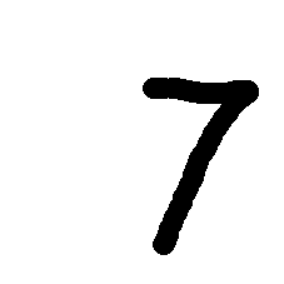

1/1 [==============================] - 0s 36ms/step
284
284


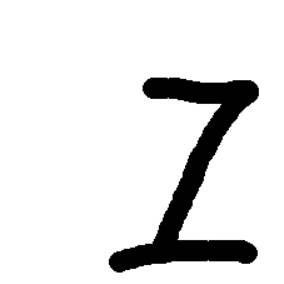

1/1 [==============================] - 0s 41ms/step
284
284


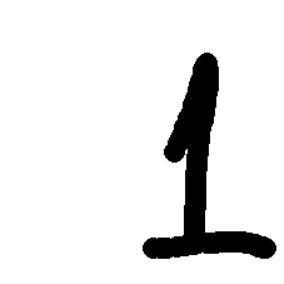

1/1 [==============================] - 0s 41ms/step
284
284


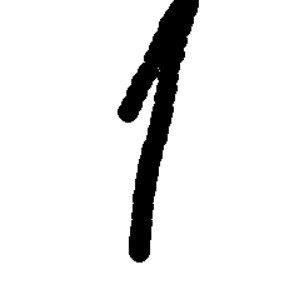

1/1 [==============================] - 0s 49ms/step


In [1]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, ImageOps
import numpy as np

model = load_model('mnist7.h5')

def predict_digit(img):
    display(img)
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    display(img)
    img = ImageOps.invert(img)
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=280, height=280, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        self.img_on_canvas = None
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        m = self.canvas.winfo_rootx()+80
        n = self.canvas.winfo_rooty()+80
        width = self.canvas.winfo_width()
        height = self.canvas.winfo_height()
        print(width)
        print(height)

        # Create a bounding box for the canvas
        rect = (m, n, m+width, n+height)

        # Grab the image using the bounding box
        im = ImageGrab.grab(rect)

        # Grab the image using the bounding box
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()